# 10.6 The Encoder-Decoder Architecture

In general seq-to-seq problems like machine translation, inputs and outputs are of varying lengths that are unaligned. The standard approach to handle this sort of data is to design an "encoder-decoder" architecture consisting of two major components.

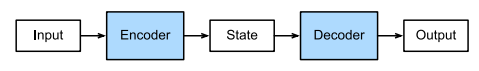

In [1]:
from torch import nn
from d2l import torch as d2l

## 10.6.1 Encoder

In the encoder interface, we just specify that the encoder takes variable-length sequences as input X. The implementation will be provided by any model that inherits this base Encoder class.

In [ ]:
class Encoder(nn.Module): #@save
    """The base encoder interface for the encoder--decoder architecture."""
    def __init__(self):
        super().__init__()
        # Later there can be additional arguments (e.g., length excluding padding)
    def forward(self, X, *args):
        raise NotImplementedError

## 10.6.2 Decoder

In the following decoder interface, we add an additional init_state method to convert the encoder output (enc_all_outputs) into the encoded state. Note that this step may require extra inputs, such as the valid length of the input, which was explained in Section 10.5. To generate a variable-length sequence token by token, every time the decoder may map an input (e.g., the generated token at the previous time step) and the encoded state into an output token at the current time step.

In [ ]:
class Decoder(nn.Module): #@save
    """The base decoder interface for the encoder--decoder architecture."""
    def __init__(self):
        super().__init__()
        # Later there can be additional arguments (e.g., length excluding padding)
    def init_state(self, enc_all_outputs, *args):
        raise NotImplementedError
    def forward(self, X, state):
        raise NotImplementedError

## 10.6.3 Putting the Encoder and Decoder Together

In [ ]:
class EncoderDecoder(d2l.Classifier): #@save
    """The base class for the encoder--decoder architecture."""
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, enc_X, dec_X, *args):
        enc_all_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_all_outputs, *args)
        # Return decoder output only
        return self.decoder(dec_X, dec_state)[0]

In the next section, we will see how to apply RNNs to design sequence-to-sequence models based on this encoder–decoder architecture.